In [1]:
%load_ext aiida
%aiida

Loaded AiiDA DB environment - profile name: usercase3.

In [2]:
from aiida.plugins import  CalculationFactory
from aiida.orm import Dict, Code, SinglefileData
from aiida.engine.launch import run_get_node
import os

In [6]:
fluent_calcjob = CalculationFactory('marketusercase3')

fluentcalc_builder = fluent_calcjob.get_builder()
# ATSBcons          ATSBConcentration
# Precurfr          PreCursorVolumeFlowRate
# Dispfr            DispersionVolumeFlowRate
# Pilotch4fr        PilotMethaneVolumeFlowRate
# Piloto2fr         PilotOxygenVolumeFlowRate
# Fanrate           FanExtractionVolumeFlowRate
user_input = {
    "ATSBcons": 1.94,
    "Precurfr": 40.0,
    "Dispfr": 72.0,
    "Pilotch4fr": 4.0,
    "Piloto2fr": 8.0,
    "Fanrate": 270.0,
}

fluentcalc_builder.user_inputs = Dict(user_input)
fluentcalc_builder.code = Code.get(label='FSP_v1')

# Run in 'dryrun' mode 
fluentcalc_builder.metadata.dry_run = True
outnode = run_get_node(fluentcalc_builder)

ValueError: Error occurred validating port 'inputs.cas_file': required value was not provided for 'cas_file'

In [6]:
# Run with 'dryrun' mode turned off (production)
fluentcalc_builder.metadata.dry_run = False 
outnode = run_get_node(fluentcalc_builder)
calc_node = outnode[-1]

05/24/2022 10:22:58 AM <4209> aiida.scheduler.direct: [WARNING] Physical memory limiting is not supported by the direct scheduler.
05/24/2022 10:23:00 AM <4209> aiida.parser.UserCase3Parser: [ERROR] Found files '['_scheduler-stderr.txt', '_scheduler-stdout.txt']', expected to find '['Monitor_progress-FSP-Lurederra_alumina.out']'
05/24/2022 10:23:00 AM <4209> aiida.orm.nodes.process.calculation.calcjob.CalcJobNode: [WARNING] output parser returned exit code<300>: Calculation did not produce all expected output files.


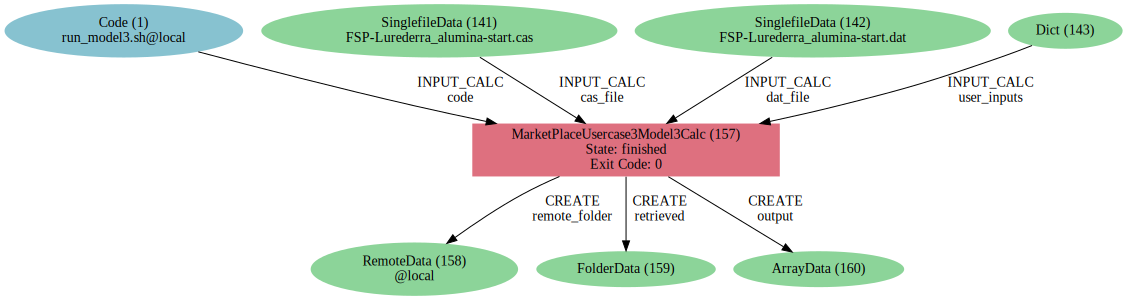

In [10]:
# Visualize the graph 

from aiida import orm
from aiida.tools.visualization import Graph
graph = Graph()
graph.add_incoming(calc_node, annotate_links="both")
graph.add_outgoing(calc_node, annotate_links="both")
graph.graphviz